In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time
from datetime import datetime,timedelta

import warnings
warnings.filterwarnings('ignore')

In [382]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [383]:
files = sorted(glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\생필품 농수축산물 가격 정보\*.csv'),reverse=True)
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\생필품 농수축산물 가격 정보\\생필품 농수축산물 가격 정보(2021년).csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\생필품 농수축산물 가격 정보\\생필품 농수축산물 가격 정보(2020년).csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\생필품 농수축산물 가격 정보\\생필품 농수축산물 가격 정보(2019년).csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\생필품 농수축산물 가격 정보\\생필품 농수축산물 가격 정보(2018년).csv',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\생필품 농수축산물 가격 정보\\생필품 농수축산물 가격 정보(2013년_2017년).csv']

In [384]:
df = pd.DataFrame()
for f in files:
    tmp_df = pd.read_csv(f,encoding='cp949')
    df = pd.concat([df,tmp_df])
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438313 entries, 0 to 97072
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               438313 non-null  int64 
 1   시장/마트 번호           438313 non-null  int64 
 2   시장/마트 이름           438313 non-null  object
 3   품목 번호              438313 non-null  int64 
 4   품목 이름              438256 non-null  object
 5   실판매규격              438313 non-null  object
 6   가격(원)              438313 non-null  int64 
 7   년도-월               438313 non-null  object
 8   비고                 350789 non-null  object
 9   시장유형 구분(시장/마트) 코드  438313 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  438313 non-null  object
 11  자치구 코드             438313 non-null  int64 
 12  자치구 이름             438313 non-null  object
 13  점검일자               438313 non-null  object
dtypes: int64(6), object(8)
memory usage: 50.2+ MB


In [386]:
df.describe()

,일련번호,시장/마트 번호,품목 번호,가격(원),시장유형 구분(시장/마트) 코드,자치구 코드
count,4.383130e+05,438313.000000,438313.000000,4.383130e+05,438313.000000,438313.000000
mean,1.372881e+06,102.629758,214.045833,1.124313e+04,1.509419,416529.785792
std,3.454416e+05,68.069150,107.996629,3.617032e+06,0.499912,185477.611658
min,4.023210e+05,1.000000,13.000000,0.000000e+00,1.000000,110000.000000
25%,1.289410e+06,44.000000,131.000000,1.980000e+03,1.000000,260000.000000
50%,1.495259e+06,92.000000,266.000000,3.000000e+03,2.000000,410000.000000
75%,1.611768e+06,146.000000,307.000000,5.600000e+03,2.000000,560000.000000
max,1.724779e+06,229.000000,324.000000,2.394024e+09,2.000000,740000.000000


In [387]:
df.describe(include=np.object)

,시장/마트 이름,품목 이름,실판매규격,년도-월,비고,시장유형 구분(시장/마트) 이름,자치구 이름,점검일자
count,438313,438256,438313,438313,350789,438313,438313,438313
unique,158,94,8447,107,44082,2,25,306
top,목3동시장,오이(다다기),1개,2020-11,국내산,대형마트,중구,2020-07-30
freq,4569,20835,92747,15003,38671,223285,26514,14797


In [388]:
df.isnull().sum()

일련번호                     0
시장/마트 번호                 0
시장/마트 이름                 0
품목 번호                    0
품목 이름                   57
실판매규격                    0
가격(원)                    0
년도-월                     0
비고                   87524
시장유형 구분(시장/마트) 코드        0
시장유형 구분(시장/마트) 이름        0
자치구 코드                   0
자치구 이름                   0
점검일자                     0
dtype: int64

**가격, 무게 분포는?**

**g당 가격이 가장 높은 품목 top20?**

**년도/월/일별 분포는?**

**시장/마트 품목 분포는?**

**수입산 분포는?**

**국내산,수입산,기타 항목별 품목 top10?**

**자치구 분포는?**

**시장유형별 품목 top10?**


## 전처리

In [389]:
df = df.drop(['일련번호', '시장/마트 번호','시장유형 구분(시장/마트) 코드','자치구 코드','품목 번호'],axis=1)

In [390]:
df.drop(df[df['가격(원)']>100000].index,inplace=True)

In [391]:
df['비고'] = df['비고'].fillna('없음')
df = df.dropna()

In [392]:
df.reset_index(drop=True,inplace=True)
df.head(10)

,시장/마트 이름,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 이름,자치구 이름,점검일자
0,롯데마트 구로점,사과,1개 (300g),1598,2021-01,"국내산,부사",대형마트,구로구,2021-01-21
1,롯데마트 구로점,배,1개 (600g),1590,2021-01,"국내산,신고",대형마트,구로구,2021-01-21
2,롯데마트 구로점,배추,1포기(2kg),3990,2021-01,국내산,대형마트,구로구,2021-01-21
3,롯데마트 구로점,무,1개 (900g),1990,2021-01,국내산,대형마트,구로구,2021-01-21
4,롯데마트 구로점,양파,1개 (200g),990,2021-01,국내산,대형마트,구로구,2021-01-21
5,롯데마트 구로점,상추,1봉지(200g),2490,2021-01,"국내산,적상추",대형마트,구로구,2021-01-21
6,롯데마트 구로점,오이,1개 (200g),1190,2021-01,"국내산,백오이",대형마트,구로구,2021-01-21
7,롯데마트 구로점,애호박,1개 (300g),2790,2021-01,"국내산,청원",대형마트,구로구,2021-01-21
8,롯데마트 구로점,쇠고기,100g,9980,2021-01,"국내산,한우,치맛살",대형마트,구로구,2021-01-21
9,롯데마트 구로점,돼지고기,100g,1990,2021-01,"국내산,생삼겹살",대형마트,구로구,2021-01-21


In [393]:
df['실판매규격'].unique()

array(['1개 (300g)', '1개 (600g)', '1포기(2kg)', ..., '1개   1.4kg',
       '1마리  22cm몸통길이', '1마리  38cm'], dtype=object)

In [394]:
def convert_unit(x):
    word = x.split('(')[-1]
    if ')' in word:
        return word[:-1]
    else:
        return word


df['실판매규격'] = df['실판매규격'].apply(convert_unit)

In [395]:
import re
p = re.compile('[a-z0-9.]+')
def convert_weight(w):
    try:
        if 'kg' in w:
            return float(w[:-2])*1000
        else:
            return float(w[:-1])
    except:
        return -1

def unit_to_weight(x):
    tmp_list = p.findall(x.replace(',','.'))
    for w in tmp_list:
        if 'g' in w:
            idx = w.find('g')
            return convert_weight(w[:idx+1])
    return -1

df['무게규격'] = df['실판매규격'].apply(unit_to_weight)

In [396]:
def convert_where(x):
    if '국내' in x or '국낸' in x or '국산' in x or '국나' in x or '극내' in x or '구내' in x or '국네' in x or '국매' in x:
        return '국내산'
    elif '일본' in x:
        return '일본산'
    elif '중국' in x or '증국' in x:
        return '중국산'
    elif '미국' in x:
        return '미국산'
    elif '러시' in x:
        return '러시아산'
    elif '노르웨이' in x:
        return '노르웨이산'
    elif '대만' in x:
        return '대만산'
    elif '가나' in x:
        return '가나산'
    elif '영국' in x:
        return '영국산'
    elif '아르헨티나' in x:
        return '아르헨티나산'
    elif '캐나다' in x or '케나다' in x:
        return '케나다산'
    elif '수입' in x:
        return '수입산'
    else:
        return '기타'

df['원산지'] = pd.DataFrame(df['비고'].apply(convert_where))

In [397]:
def convert_year(x):
    return datetime.strptime(x,'%Y-%m-%d').year
def convert_month(x):
    return datetime.strptime(x,'%Y-%m-%d').month
def convert_day(x):
    return datetime.strptime(x,'%Y-%m-%d').day

df['점검년도'] = df['점검일자'].apply(convert_year)
df['점검월'] = df['점검일자'].apply(convert_month)
df['점검일'] = df['점검일자'].apply(convert_day)

In [398]:
df['g당 가격'] = df['가격(원)']/df['무게규격']

In [434]:
df.drop(df[df['무게규격']>15000].index,inplace=True)
df.drop(df[(df['무게규격']<30)&(df['무게규격']>=0)].index,inplace=True)

In [507]:
def convert_name(x):
    if '고등어' in x:
        return '고등어'
    elif '한우' in x:
        return '쇠고기(한우)'
    elif '쇠고기' in x:
        return '쇠고기'
    elif '명태' in x:
        return '명태'
    elif '조기' in x:
        return '조기'
    elif '돼지고기' in x:
        return '돼지고기'
    elif '오징어' in x:
        return '오징어'
    elif '달걀' in x:
        return '달걀'
    elif '닭고기' in x:
        return '닭고기'
    elif '사과' in x:
        return '사과'
    elif '배' in x:
        return '배'
    elif '호박' in x:
        return '호박'
    elif '오이' in x:
        return '오이'
    elif '양파' in x:
        return '양파'
    else:
        return x
df['품목 이름'] = df['품목 이름'].apply(convert_name)

In [503]:
df.reset_index(drop=True)
df.head()

,시장/마트 이름,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 이름,자치구 이름,점검일자,무게규격,원산지,점검년도,점검월,점검일,g당 가격
0,롯데마트 구로점,사과,300g,1598,2021-01,"국내산,부사",대형마트,구로구,2021-01-21,300.0,국내산,2021,1,21,5.326667
1,롯데마트 구로점,배,600g,1590,2021-01,"국내산,신고",대형마트,구로구,2021-01-21,600.0,국내산,2021,1,21,2.650000
2,롯데마트 구로점,배추,2kg,3990,2021-01,국내산,대형마트,구로구,2021-01-21,2000.0,국내산,2021,1,21,1.995000
3,롯데마트 구로점,무,900g,1990,2021-01,국내산,대형마트,구로구,2021-01-21,900.0,국내산,2021,1,21,2.211111
4,롯데마트 구로점,양파,200g,990,2021-01,국내산,대형마트,구로구,2021-01-21,200.0,국내산,2021,1,21,4.950000


## 시각화

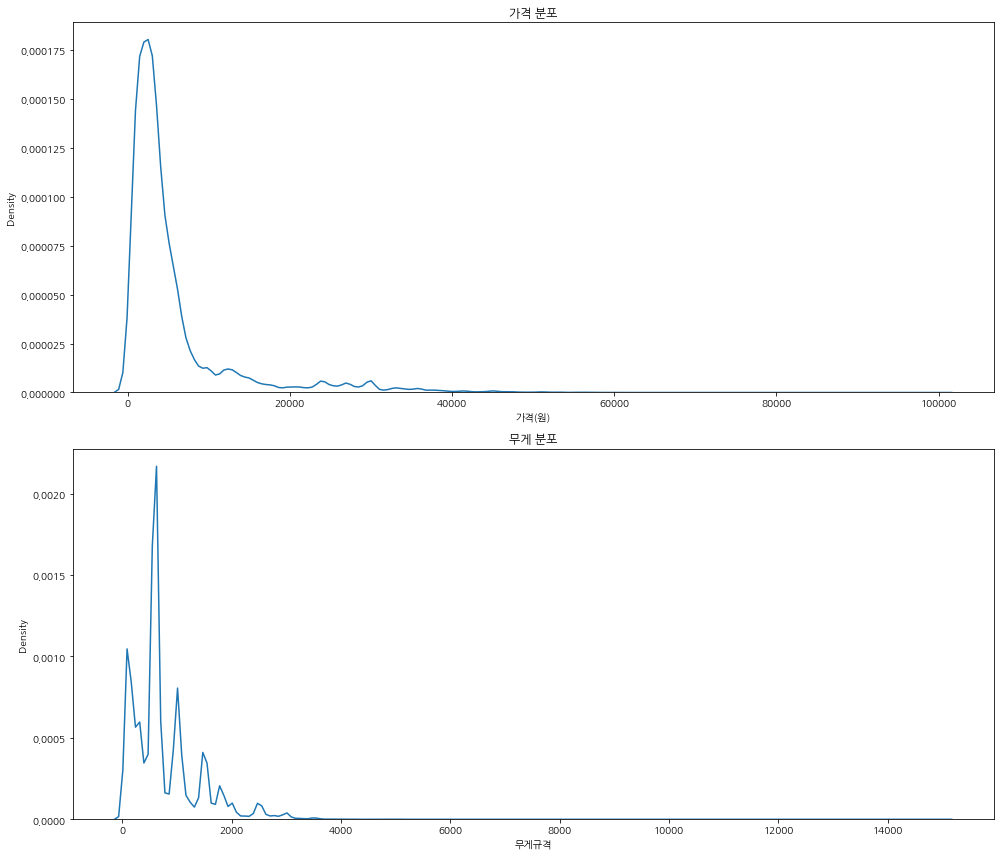

In [426]:
fig,axes = plt.subplots(2,1,figsize=(14,12))
sns.kdeplot(data=df['가격(원)'],ax=axes[0]).set(title='가격 분포')
sns.kdeplot(data=df[df['무게규격']>0]['무게규격'],ax=axes[1]).set(title='무게 분포')
plt.tight_layout()

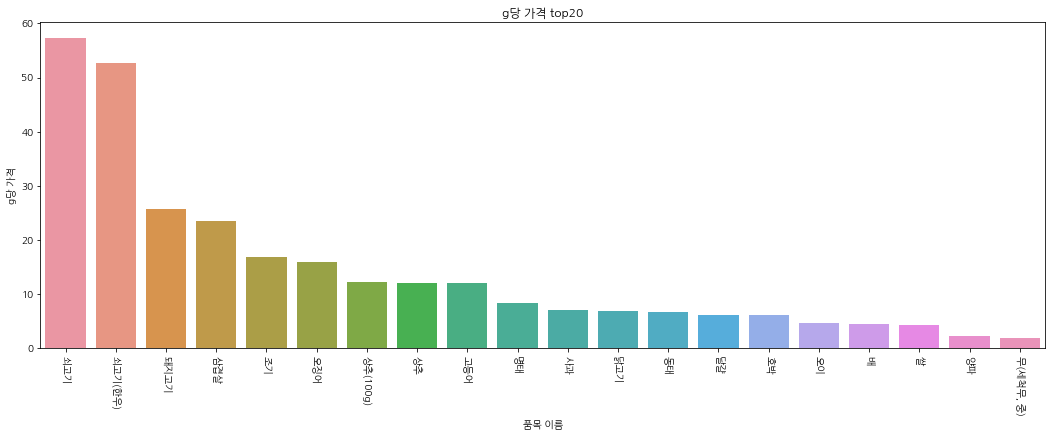

In [519]:
sub_df = df[df['g당 가격']>0].groupby(['품목 이름'],as_index=False)['g당 가격'].mean().sort_values(['g당 가격'],ascending=False)
plt.figure(figsize=(18,6))
sns.barplot(data=sub_df.head(20),x='품목 이름',y='g당 가격').set(title='g당 가격 top20')
g = plt.xticks(rotation=-90)

[Text(0.5, 1.0, '일별 분포'), Text(0, 0.5, 'count')]

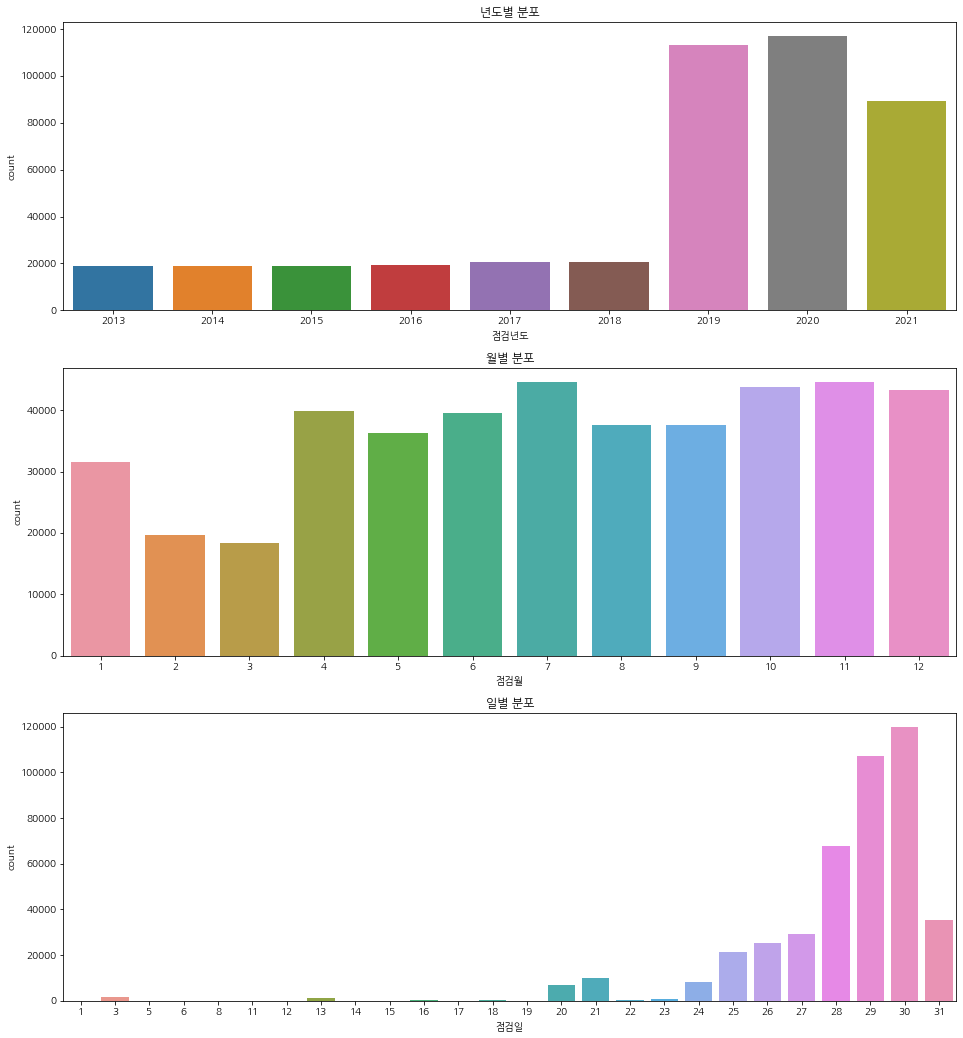

In [550]:
fig,axes = plt.subplots(3,1,figsize=(16,18))
sub_df1 = df.groupby(['점검년도'],as_index=False)['비고'].count()
sub_df2 = df.groupby(['점검월'],as_index=False)['비고'].count()
sub_df3 = df.groupby(['점검일'],as_index=False)['비고'].count()
sns.barplot(data=sub_df1,x='점검년도',y='비고',ax=axes[0]).set(title='년도별 분포',ylabel='count')
sns.barplot(data=sub_df2,x='점검월',y='비고',ax=axes[1]).set(title='월별 분포',ylabel='count')
sns.barplot(data=sub_df3,x='점검일',y='비고',ax=axes[2]).set(title='일별 분포',ylabel='count')

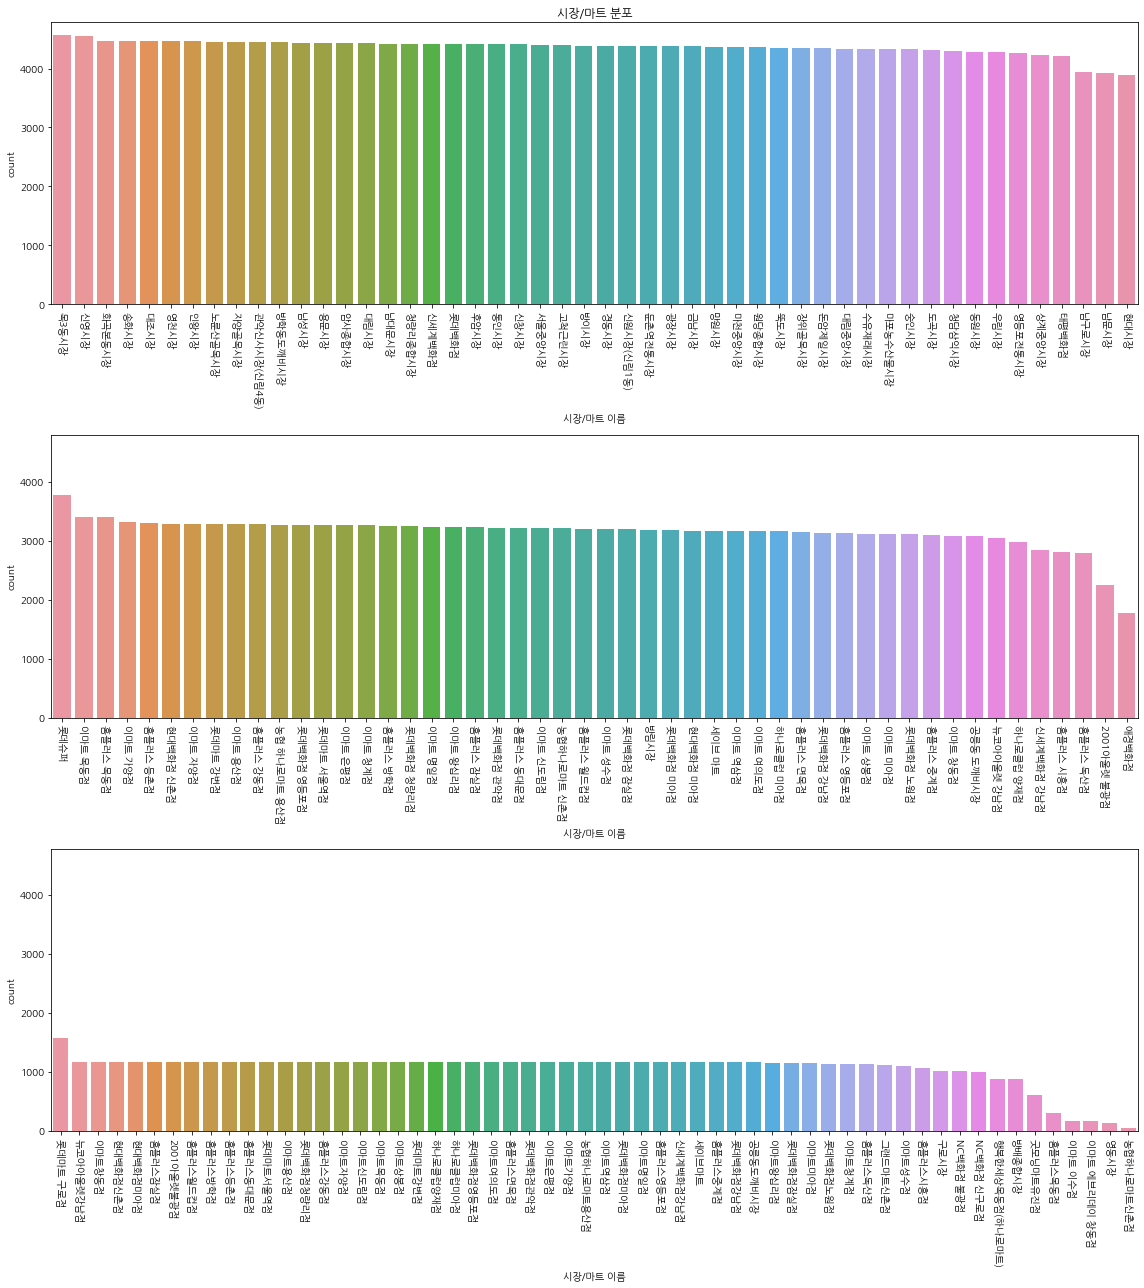

In [540]:
fig,axes=plt.subplots(3,1,figsize=(16,18),sharey=True)
tmp_df = df.groupby(['시장/마트 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
sns.barplot(data=tmp_df.iloc[:50],x='시장/마트 이름',y='비고',ax=axes[0]).set(title=f'시장/마트 분포',ylabel='count')
sns.barplot(data=tmp_df.iloc[50:100],x='시장/마트 이름',y='비고',ax=axes[1]).set(ylabel='count')
sns.barplot(data=tmp_df.iloc[100:],x='시장/마트 이름',y='비고',ax=axes[2]).set(ylabel='count')
g1=axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90)
g2=axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90)
g3=axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=-90)
plt.tight_layout()


<AxesSubplot: ylabel='비고'>

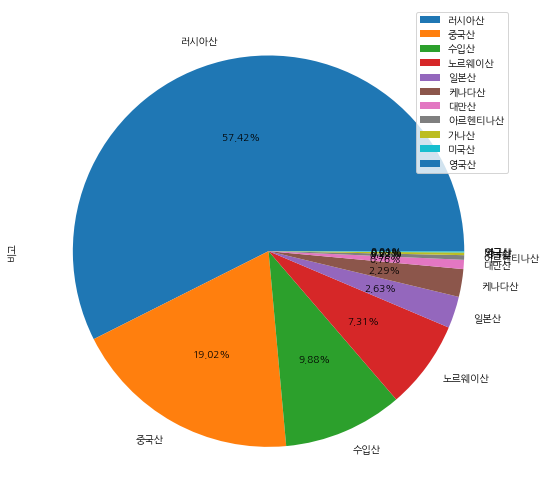

In [490]:
sub_df = df[(df['원산지']!='국내산')&(df['원산지']!='기타')].groupby(['원산지'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
sub_df.plot.pie(y='비고',labels=sub_df['원산지'].values,figsize=(9,9),autopct='%0.2f%%')

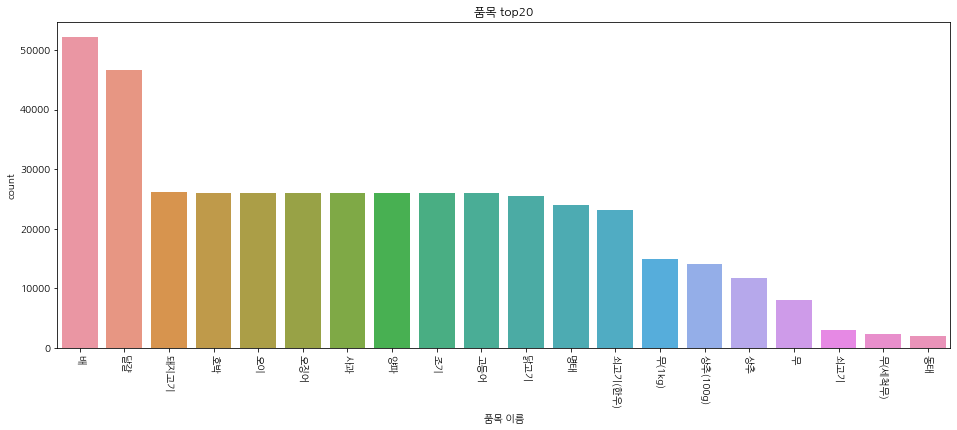

In [517]:
sub_df = df.groupby(['품목 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(data=sub_df.head(20),x='품목 이름',y='비고').set(title=f'품목 top20',ylabel='count')
g=plt.xticks(rotation=-90)

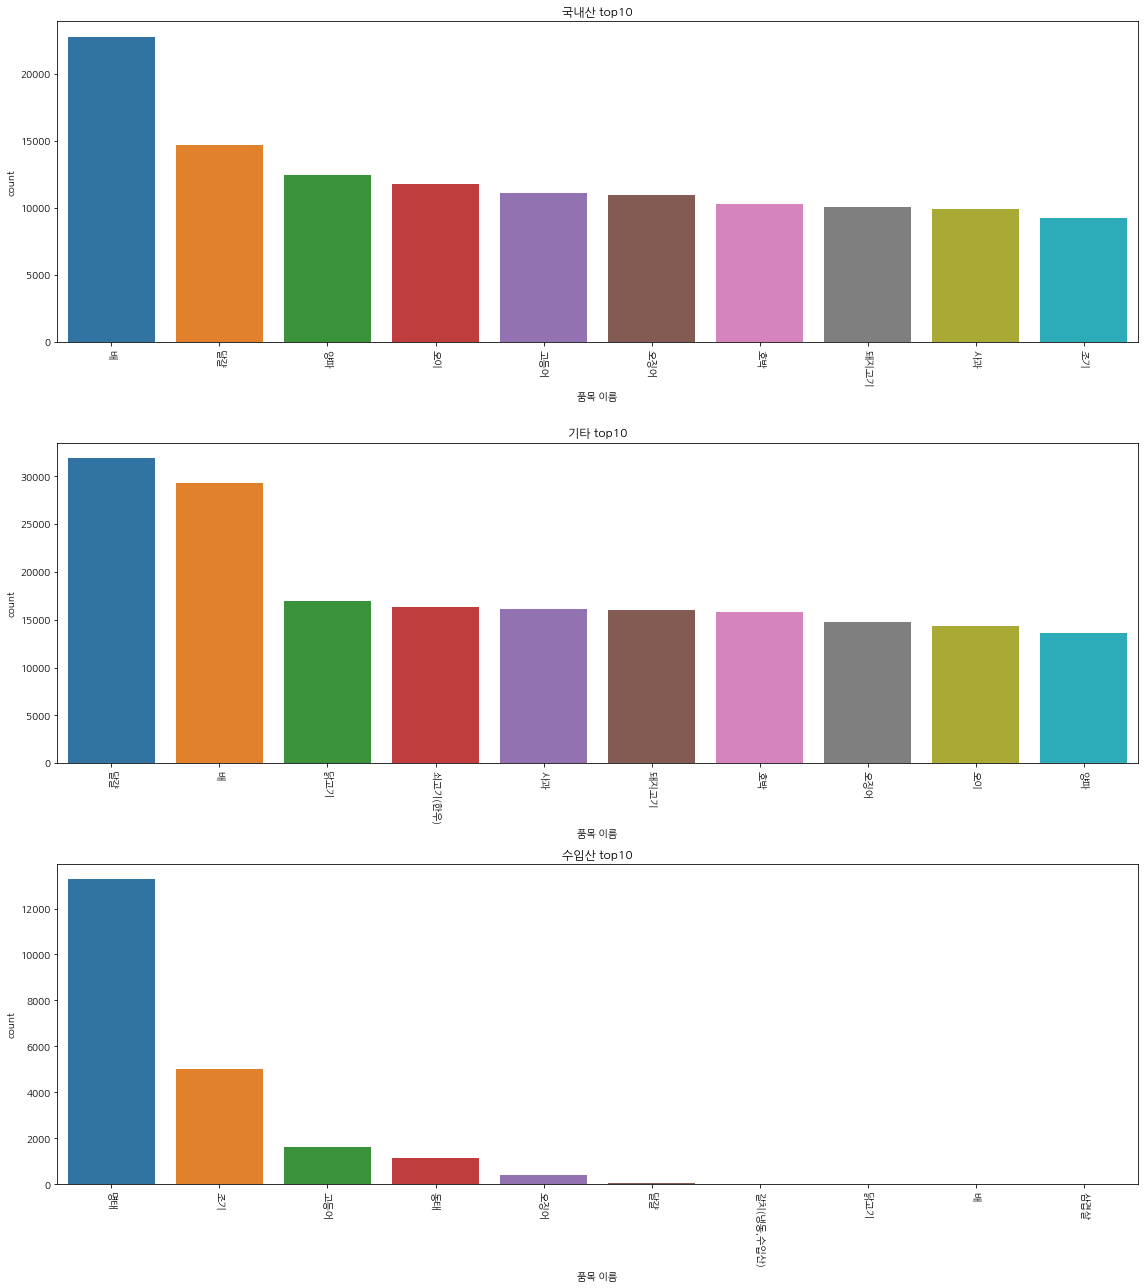

In [515]:
sub_df1 = df[df['원산지']=='국내산'].groupby(['품목 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
sub_df2 = df[df['원산지']=='기타'].groupby(['품목 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
sub_df3 = df[(df['원산지']!='국내산')&(df['원산지']!='기타')].groupby(['품목 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
fig,axes = plt.subplots(3,1,figsize=(16,18))
sns.barplot(data=sub_df1.head(10),x='품목 이름',y='비고',ax=axes[0]).set(title='국내산 top10',ylabel='count')
sns.barplot(data=sub_df2.head(10),x='품목 이름',y='비고',ax=axes[1]).set(title='기타 top10',ylabel='count')
sns.barplot(data=sub_df3.head(10),x='품목 이름',y='비고',ax=axes[2]).set(title='수입산 top10',ylabel='count')
g1=axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90)
g2=axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90)
g3=axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=-90)
plt.tight_layout()

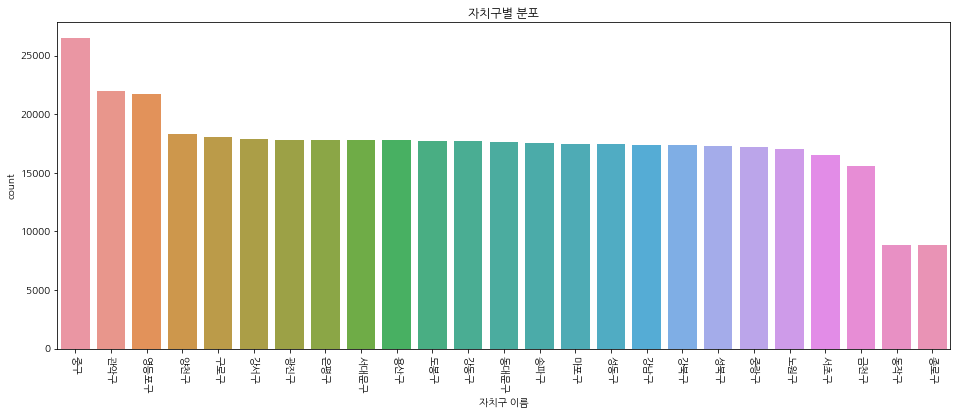

In [522]:
sub_df = df.groupby(['자치구 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(data=sub_df,x='자치구 이름',y='비고').set(title=f'자치구별 분포',ylabel='count')
g=plt.xticks(rotation=-90)

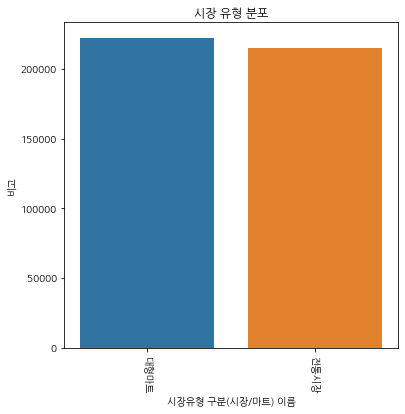

In [545]:
plt.figure(figsize=(6,6))
sub_df = df.groupby(['시장유형 구분(시장/마트) 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
sns.barplot(data=sub_df,x='시장유형 구분(시장/마트) 이름',y='비고').set(title='시장 유형 분포')
g=plt.xticks(rotation=-90)

[Text(0.5, 1.0, '영등포구 시장 유형 분포')]

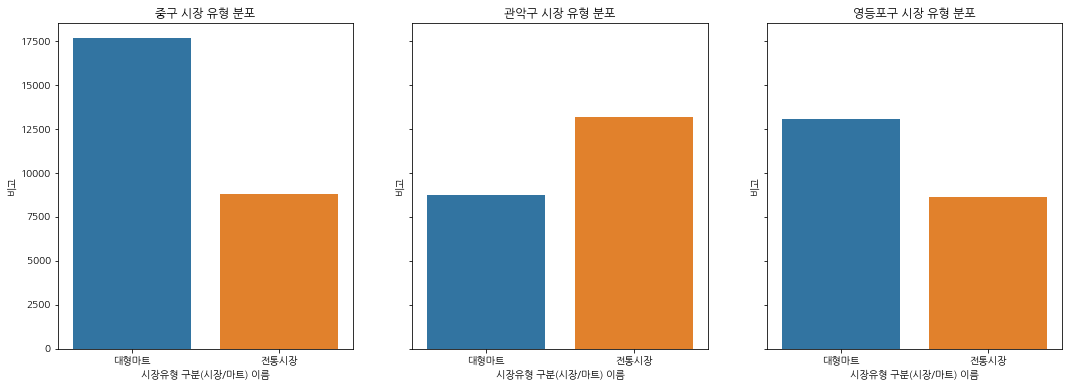

In [547]:
fig,axes = plt.subplots(1,3,figsize=(18,6),sharey=True)
sub_df1 = df[df['자치구 이름']=='중구'].groupby(['시장유형 구분(시장/마트) 이름'],as_index=False)['비고'].count()
sub_df2 = df[df['자치구 이름']=='관악구'].groupby(['시장유형 구분(시장/마트) 이름'],as_index=False)['비고'].count()
sub_df3 = df[df['자치구 이름']=='영등포구'].groupby(['시장유형 구분(시장/마트) 이름'],as_index=False)['비고'].count()
sns.barplot(data=sub_df1,x='시장유형 구분(시장/마트) 이름',y='비고',ax=axes[0]).set(title='중구 시장 유형 분포')
sns.barplot(data=sub_df2,x='시장유형 구분(시장/마트) 이름',y='비고',ax=axes[1]).set(title='관악구 시장 유형 분포')
sns.barplot(data=sub_df3,x='시장유형 구분(시장/마트) 이름',y='비고',ax=axes[2]).set(title='영등포구 시장 유형 분포')

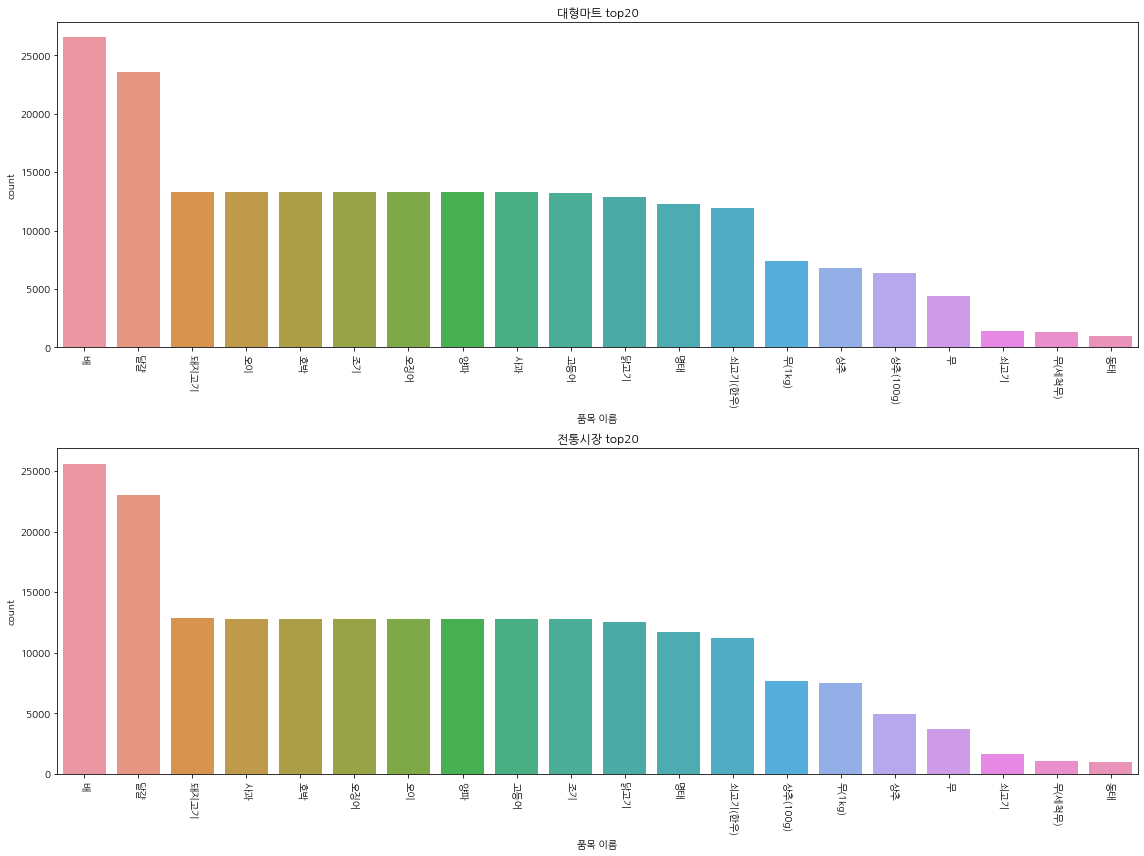

In [518]:
sub_df1 = df[df['시장유형 구분(시장/마트) 이름']=='대형마트'].groupby(['품목 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
sub_df2 = df[df['시장유형 구분(시장/마트) 이름']=='전통시장'].groupby(['품목 이름'],as_index=False)['비고'].count().sort_values('비고',ascending=False)
fig,axes = plt.subplots(2,1,figsize=(16,12))
sns.barplot(data=sub_df1.head(20),x='품목 이름',y='비고',ax=axes[0]).set(title='대형마트 top20',ylabel='count')
sns.barplot(data=sub_df2.head(20),x='품목 이름',y='비고',ax=axes[1]).set(title='전통시장 top20',ylabel='count')
g1=axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90)
g2=axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90)
plt.tight_layout()

## 분석 결과

**가격, 무게 분포는?**

- 가격은 2천원-6천원 사이에 가장 많이 분포하고, 무게는 500-1000g에 많이 분포한다.

**g당 가격이 가장 높은 품목 top20?**

- 무게당 가격이 가장 높은 품목은 소고기,돼지고기 등 육류가 가장 높고 상추와 조기,오징어 등 해산물이 그다음 높다.

**년도/월/일별 분포는?**

- 2019년에 품목 수가 급격히 상승하였다.

- 1-3월에는 품목 수가 적고, 나머지 월은 비슷하다.

- 주로 25일 이후에 점검이 집중되어 있다.

**시장/마트 품목 분포는?**

- 유명한 전통시장들이 품목이 많고, 그 다음 대형 마트들의 품목이 많다.

**수입산 분포는?**

- 러시아산이 가장 많고 중국산,노르웨이산,일본산,케나다산 등이 차례대로 높다.

**국내산,수입산,기타 항목별 품목 top10?**

- 국내산과 기타는 배,달걀,육류,채소류 등이 주를 이룬다.

- 수입산은 대부분 해산물이 주를 이룬다.

**자치구 분포는?**

- 중구,관악구,영등포구가 특히 높고 동작구,종로구가 특히 낮다.

- 나머지는 비슷하다.

**시장유형별 품목 top10?**

- 시장유형별로 큰 차이는 없고 배,달걀,돼지고기,채소류가 주로 높다.


## 분석 결과에 대한 생각

- 수입품의 대부분이 해산물이고, 절반 이상이 러시아산이기 때문에 최근 우러 전쟁으로 인해 해산물 가격이 큰 영향을 받았을 것이다.

- 2019년부터 품목 수가 크게 증가한 것은 시장이 갑자기 성장했다기 보다는 품목 세분화와 점검 빈도수 증가 등이 원인일 것 같다.

- 중구가 시장의 수가 가장 많기 때문에 접근성이 가장 좋은 지역이라고 볼 수 있다.

- 전통시장이 대형마트보다 품목이 많기 때문에 관악구가 가장 다양한 제품을 접할 수 있는 지역이라고 볼 수 있다.